In [50]:
import pandas as pd
from matplotlib import pyplot as plt

def processProbeLog(filename):
    file = open(filename, 'r')
    switchid = None
    
    data = {}
    for line in file:
        if line.startswith('PROBE_STAT'):
            l = line.strip().split(' ')
            switchid = int(l[1])
            portid = int(l[2])
            maxq = int(l[3])
            
            if portid not in data:
                data[portid] = []
            
            data[portid].append(maxq)

    indexlen = 9999999999
    for key in data:
        indexlen = min(indexlen, len(data[key]))
        
    indexlen = 3000
    
    for key in data:
        data[key] = data[key][:indexlen]
        
    index = [i for i in range(indexlen)]
    plt.rcParams["figure.figsize"] = [10, 6]
    df = pd.DataFrame(data, index=index)
    df.plot.line()
    plt.title("Maximum queue occupancy trend of ports in switch {}".format(switchid))
    plt.ylabel("Maximum queue occupancy")
    plt.xlabel("nth probe")
    
    

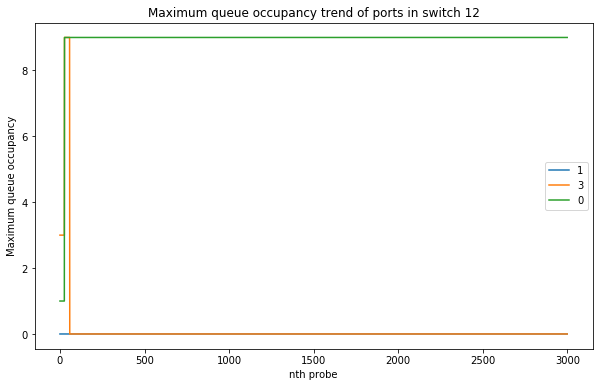

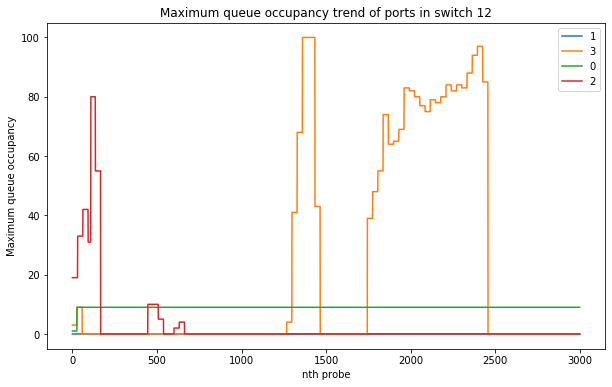

In [57]:
#Terminal 0 ------- switch 12 ---------- Terminal 1

#Queue size = 100 packets
#Delay = 5 microsec
#Default case = No any background data transfers between terminal 0 and 1
#Other case = Data transfer between 0 and 1

processProbeLog("probe12default.log")
processProbeLog("probe12.log")

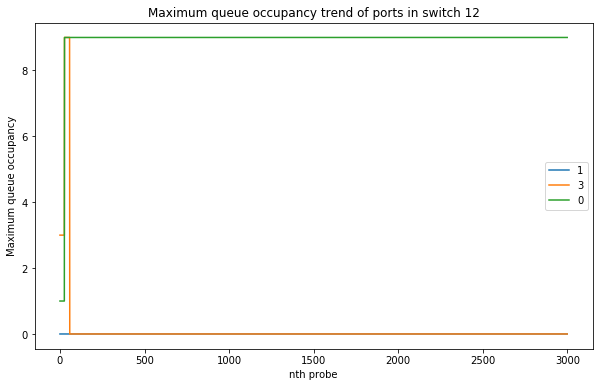

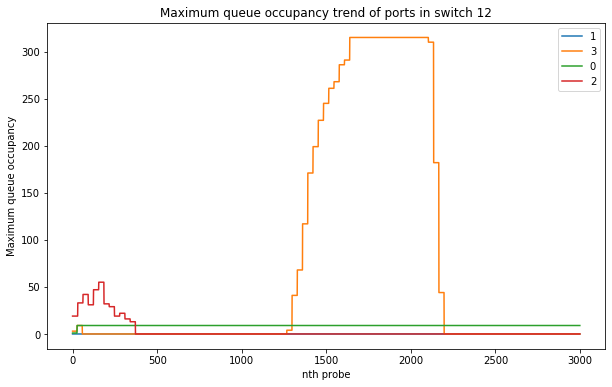

In [58]:
# same as above but the queue size is 1000p

processProbeLog("probe12default-1000p.log")
processProbeLog("probe12-1000p.log")